In [403]:
#Import Libraries

import pandas as pd
from pandas import Series, DataFrame

In [404]:
titanic_train = pd.read_csv("train.csv")

In [405]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [406]:
titanic_train.Survived.unique() #1 meand survived and 0 means not survived

array([0, 1], dtype=int64)

In [407]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [408]:
#check for missing values

titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [409]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [410]:
# Let's import what we'll need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

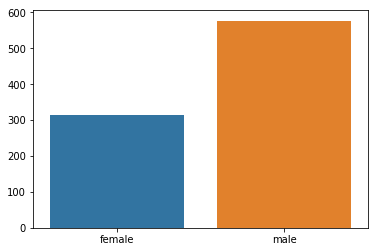

In [411]:
# lets visualize the count of show up or not
groups = titanic_train.groupby(['Sex'])
gps = groups.size()
ax = sns.barplot(x=gps.index.tolist(), y=gps.values)

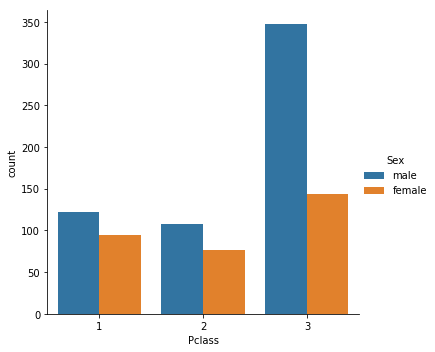

In [412]:
# Now let's seperate the genders by classes, remember we can use the 'hue' arguement here!
sns.catplot('Pclass',data=titanic_train,hue='Sex', kind= 'count')

In [413]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column

# Revisit Lecture 45 for a refresher on how to do this.

# First let's make a function to sort through the sex 
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex
    

# We'll define a new column called 'person', remember to specify axis=1 for columns and not index
titanic_train['person'] = titanic_train[['Age','Sex']].apply(male_female_child,axis=1)

In [414]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


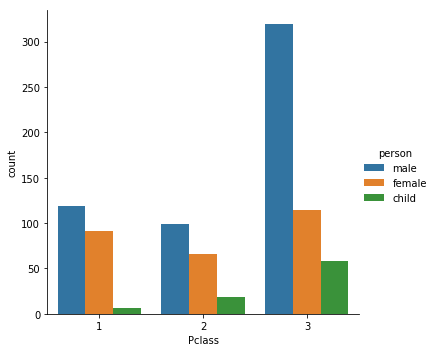

In [415]:
# Let's try the factorplot again!
sns.catplot('Pclass',data=titanic_train,hue='person', kind= 'count')

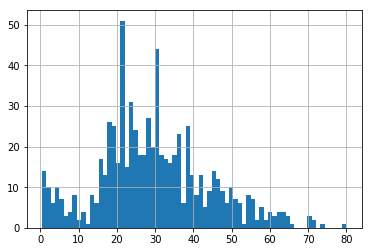

In [416]:
# Quick way to create a histogram using pandas
titanic_train['Age'].hist(bins=70)

In [417]:
# We could also get a quick overall comparison of male,female,child
titanic_train['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

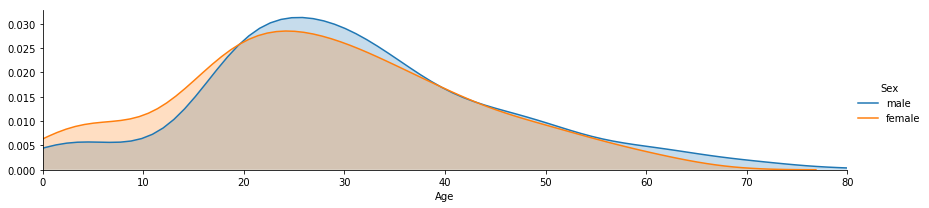

In [418]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_train, hue="Sex",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic_train['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

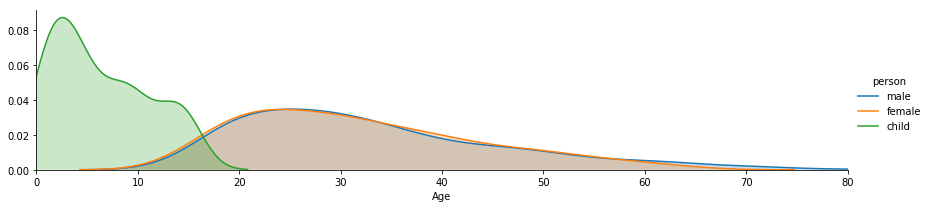

In [419]:
# We could have done the same thing for the 'person' column to include children:

fig = sns.FacetGrid(titanic_train, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_train['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

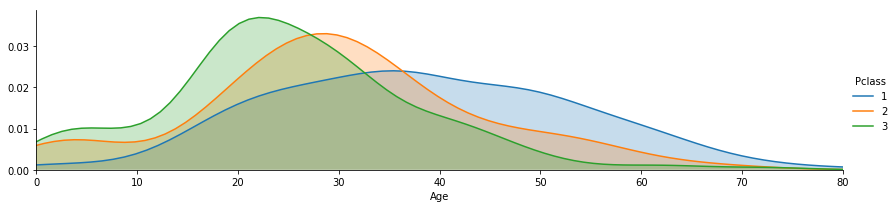

In [420]:
# We could have done the same thing for the 'Pclass' column to include children:

fig = sns.FacetGrid(titanic_train, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_train['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [421]:
# First we'll drop the NaN values and create a new object, deck
deck = titanic_train['Cabin'].dropna()


In [422]:
# Quick preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

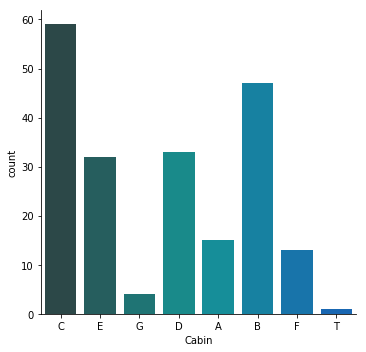

In [423]:
# So let's grab that letter for the deck level with a simple for loop

# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot('Cabin',data=cabin_df,palette='winter_d', kind='count')

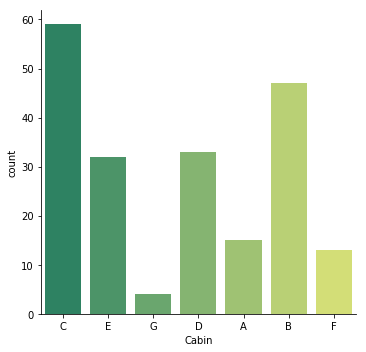

In [424]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.catplot('Cabin',data=cabin_df,palette='summer', kind = 'count')

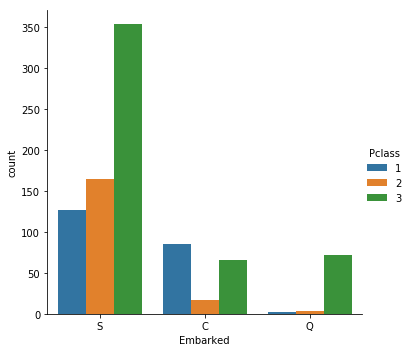

In [425]:
# Now we can make a quick factorplot to check out the results, note the x_order argument, used to deal with NaN values
sns.catplot('Embarked',data=titanic_train,hue='Pclass', kind='count')

## Who was alone and who was with family?

In [426]:
# Let's start by adding a new column to define alone

# We'll add the parent/child column with the sibsp column
titanic_train['Alone'] =  titanic_train.Parch + titanic_train.SibSp
titanic_train['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [427]:
# Look for >0 or ==0 to set alone status
titanic_train['Alone'].loc[titanic_train['Alone'] >0] = 'With Family'
titanic_train['Alone'].loc[titanic_train['Alone'] == 0] = 'Alone'

C:\Users\vibhu\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [428]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


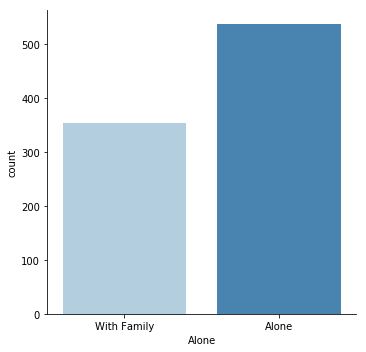

In [429]:
# Now let's get a simple visualization!
sns.catplot('Alone',data=titanic_train,palette='Blues', kind='count')

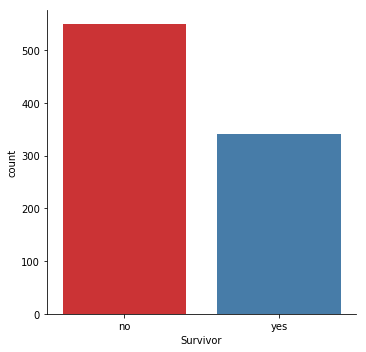

In [430]:
# Let's start by creating a new column for legibility purposes through mapping (Lec 36)
titanic_train["Survivor"] = titanic_train.Survived.map({0: "no", 1: "yes"})

# Let's just get a quick overall view of survied vs died. 
sns.catplot('Survivor',data=titanic_train,palette='Set1', kind = 'count')

C:\Users\vibhu\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


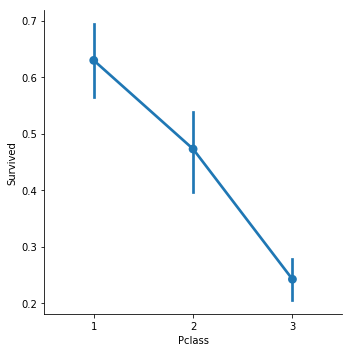

In [431]:
# Let's use a factor plot again, but now considering class
sns.factorplot('Pclass','Survived',data=titanic_train)

C:\Users\vibhu\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


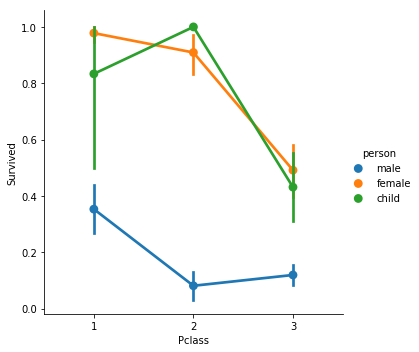

In [432]:
# Let's use a factor plot again, but now considering class and gender
sns.factorplot('Pclass','Survived',hue='person',data=titanic_train)

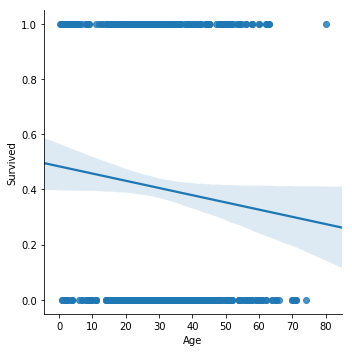

In [433]:
# Let's use a linear plot on age versus survival
sns.lmplot('Age','Survived',data=titanic_train)

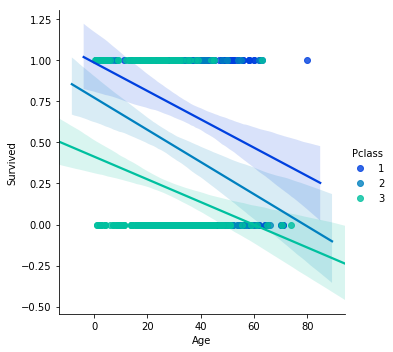

In [434]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_train,palette='winter')

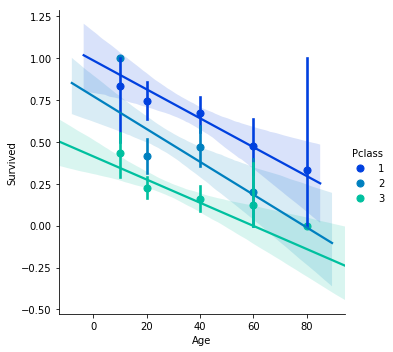

In [435]:
# Let's use a linear plot on age versus survival using hue for class seperation
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_train,palette='winter',x_bins=generations)

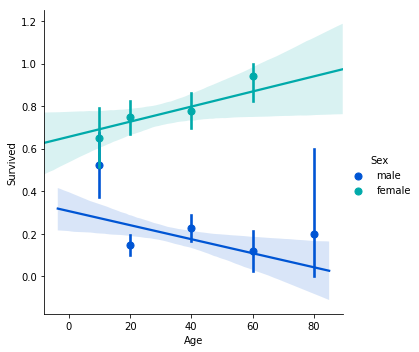

In [436]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_train,palette='winter',x_bins=generations)

## Lets do the prediction

In [489]:
test_data = pd.read_csv("test.csv")

In [490]:
train = titanic_train.copy()
test = test_data.copy()

In [491]:
#head 

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [492]:
#check for any other unusable values

print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
person           0
Alone            0
Survivor         0
dtype: int64


In [493]:
#see a summary of the training dataset

train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [494]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [495]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,no,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family,no,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family,yes,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family,yes,0


In [496]:
# Create CabinBool variable which states if someone has a Cabin data or not:

train = train.drop(['Cabin','person','Alone','Survivor',], axis = 1)
test = test.drop(['Cabin'], axis = 1)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [497]:
# We can drop the Ticket feature since it is unlikely to have useful information

train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


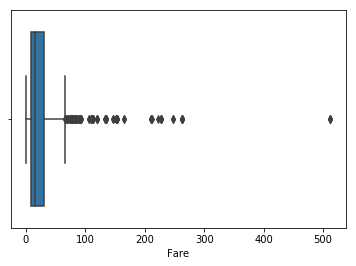

In [498]:
# It looks like there is a problem in Fare max data. Visualize with boxplot.

sns.boxplot(x = train['Fare']);

In [499]:
Q1 = train['Fare'].quantile(0.05)
Q3 = train['Fare'].quantile(0.95)
IQR = Q3 - Q1

lower_limit = Q1- 1.5*IQR
lower_limit

upper_limit = Q3 + 1.5*IQR
upper_limit

269.360375

In [500]:
# observations with Fare data higher than the upper limit:

train['Fare'] > (upper_limit)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

In [501]:
train.sort_values("Fare", ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,C,0
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,C,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,C,1
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,263.0000,S,1
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,263.0000,S,1


In [502]:
# In boxplot, there are too many data higher than upper limit; we can not change all. Just repress the highest value -512- 

train['Fare'] = train['Fare'].replace(512.3292, 270)

In [503]:
train.sort_values("Fare", ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,270.0,C,0
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,270.0,C,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,270.0,C,1
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,263.0,S,1
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,263.0,S,1


In [504]:
train.sort_values("Fare", ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,270.0,C,0
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,270.0,C,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,270.0,C,1
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,263.0,S,1
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,263.0,S,1
...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,0.0,S,0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,0.0,S,0
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,0.0,S,0
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,0.0,S,0


In [505]:
test.sort_values("Fare", ascending=False)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,512.3292,C,1
53,945,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,263.0000,S,1
69,961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,263.0000,S,1
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,262.3750,C,1
142,1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,262.3750,C,1
...,...,...,...,...,...,...,...,...,...,...
133,1025,3,"Thomas, Mr. Charles P",male,NaN,1,0,6.4375,C,0
21,913,3,"Olsen, Master. Artur Karl",male,9.0,0,1,3.1708,S,0
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,0.0000,S,0
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,0.0000,S,1


In [506]:
test['Fare'] = test['Fare'].replace(512.3292, 270)

In [507]:
test.sort_values("Fare", ascending=False)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,270.0000,C,1
53,945,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,263.0000,S,1
69,961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,263.0000,S,1
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,262.3750,C,1
142,1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,262.3750,C,1
...,...,...,...,...,...,...,...,...,...,...
133,1025,3,"Thomas, Mr. Charles P",male,NaN,1,0,6.4375,C,0
21,913,3,"Olsen, Master. Artur Karl",male,9.0,0,1,3.1708,S,0
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,0.0000,S,0
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,0.0000,S,1


In [508]:
#drop the name feature since it contains no more useful information.

train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [509]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0
Fare,891.0,31.388285,43.385988,0.00,7.9104,14.4542,31.0,270.0
CabinBool,891.0,0.228956,0.420397,0.00,0.0000,0.0000,0.0,1.0


In [510]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
CabinBool        0
dtype: int64

In [511]:
train["Age"] = train["Age"].fillna(train["Age"].median())
test["Age"] = test["Age"].fillna(test["Age"].median())

In [512]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
CabinBool      0
dtype: int64

In [513]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
CabinBool      0
dtype: int64

In [514]:
#replacing the missing values in the Embarked feature with S

train = train.fillna({"Embarked": "S"})

In [515]:
test = test.fillna({"Embarked": "S"})

In [516]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
CabinBool      0
dtype: int64

In [517]:
test[["Pclass","Fare"]].groupby("Pclass").mean()

,Fare
Pclass,
1,92.015538
2,22.202104
3,12.459678


In [518]:
test["Fare"] = test["Fare"].fillna(12)

In [519]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
CabinBool      0
dtype: int64

In [520]:
#map each Sex value to a numerical value

sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
0,1,0,3,0,22.0,1,0,7.2500,S,0
1,2,1,1,1,38.0,1,0,71.2833,C,1
2,3,1,3,1,26.0,0,0,7.9250,S,0
3,4,1,1,1,35.0,1,0,53.1000,S,1
4,5,0,3,0,35.0,0,0,8.0500,S,0


In [521]:
#map each Embarked value to a numerical value
from sklearn import preprocessing
lbe = preprocessing.LabelEncoder()
train["Embarked"] = lbe.fit_transform(train["Embarked"])
test["Embarked"] = lbe.fit_transform(test["Embarked"])
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
0,1,0,3,0,22.0,1,0,7.2500,2,0
1,2,1,1,1,38.0,1,0,71.2833,0,1
2,3,1,3,1,26.0,0,0,7.9250,2,0
3,4,1,1,1,35.0,1,0,53.1000,2,1
4,5,0,3,0,35.0,0,0,8.0500,2,0


In [522]:
bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
mylabels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = mylabels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = mylabels)

In [523]:
# Map each Age value to a numerical value:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

In [524]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup
0,1,0,3,0,22.0,1,0,7.2500,2,0,4
1,2,1,1,1,38.0,1,0,71.2833,0,1,6
2,3,1,3,1,26.0,0,0,7.9250,2,0,5
3,4,1,1,1,35.0,1,0,53.1000,2,1,5
4,5,0,3,0,35.0,0,0,8.0500,2,0,5


In [525]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup
0,892,3,0,34.5,0,0,7.8292,1,0,5
1,893,3,1,47.0,1,0,7.0000,2,0,6
2,894,2,0,62.0,0,0,9.6875,1,0,7
3,895,3,0,27.0,0,0,8.6625,2,0,5
4,896,3,1,22.0,1,1,12.2875,2,0,4


In [526]:
#dropping the Age feature for now, might change:
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [527]:
# Map Fare values into groups of numerical values:
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

In [528]:
# Drop Fare values:
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [529]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,AgeGroup,FareBand
0,1,0,3,0,1,0,2,0,4,1
1,2,1,1,1,1,0,0,1,6,4
2,3,1,3,1,0,0,2,0,5,2
3,4,1,1,1,1,0,2,1,5,4
4,5,0,3,0,0,0,2,0,5,2


In [530]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,AgeGroup,FareBand
0,892,3,0,0,0,1,0,5,1
1,893,3,1,1,0,2,0,6,1
2,894,2,0,0,0,1,0,7,2
3,895,3,0,0,0,2,0,5,2
4,896,3,1,1,1,2,0,4,2


In [531]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [532]:

train['Single'] = train['FamilySize'].map(lambda s: 1 if s == 1 else 0)
train['SmallFam'] = train['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
train['MedFam'] = train['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
train['LargeFam'] = train['FamilySize'].map(lambda s: 1 if s >= 5 else 0)

In [533]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,AgeGroup,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam
0,1,0,3,0,1,0,2,0,4,1,2,0,1,0,0
1,2,1,1,1,1,0,0,1,6,4,2,0,1,0,0
2,3,1,3,1,0,0,2,0,5,2,1,1,0,0,0
3,4,1,1,1,1,0,2,1,5,4,2,0,1,0,0
4,5,0,3,0,0,0,2,0,5,2,1,1,0,0,0


In [534]:
# Create new feature of family size:

test['Single'] = test['FamilySize'].map(lambda s: 1 if s == 1 else 0)
test['SmallFam'] = test['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
test['MedFam'] = test['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
test['LargeFam'] = test['FamilySize'].map(lambda s: 1 if s >= 5 else 0)

In [535]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,AgeGroup,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam
0,892,3,0,0,0,1,0,5,1,1,1,0,0,0
1,893,3,1,1,0,2,0,6,1,2,0,1,0,0
2,894,2,0,0,0,1,0,7,2,1,1,0,0,0
3,895,3,0,0,0,2,0,5,2,1,1,0,0,0
4,896,3,1,1,1,2,0,4,2,3,0,0,1,0


In [536]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
CabinBool      0
AgeGroup       0
FareBand       0
FamilySize     0
Single         0
SmallFam       0
MedFam         0
LargeFam       0
dtype: int64

In [537]:
# Convert Title and Embarked into dummy variables:

train = pd.get_dummies(train, columns = ["Embarked"], prefix="Em")
train = pd.get_dummies(train, columns = ["Pclass"], prefix="Pc")
train = pd.get_dummies(train, columns = ["AgeGroup"], prefix="Age")
train = pd.get_dummies(train, columns = ["FareBand"], prefix="FB")



In [538]:
train.head()

,PassengerId,Survived,Sex,SibSp,Parch,CabinBool,FamilySize,Single,SmallFam,MedFam,...,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,FB_1,FB_2,FB_3,FB_4
0,1,0,0,1,0,0,2,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,2,1,1,1,0,1,2,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,3,1,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,4,1,1,1,0,1,2,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,5,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [539]:
test = pd.get_dummies(test, columns = ["Embarked"], prefix="Em")
test = pd.get_dummies(test, columns = ["Pclass"], prefix="Pc")
test = pd.get_dummies(test, columns = ["AgeGroup"], prefix="Age")
test = pd.get_dummies(test, columns = ["FareBand"], prefix="FB")

In [540]:
test.head()

,PassengerId,Sex,SibSp,Parch,CabinBool,FamilySize,Single,SmallFam,MedFam,LargeFam,...,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,FB_1,FB_2,FB_3,FB_4
0,892,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,893,1,1,0,0,2,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,894,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,895,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,896,1,1,1,0,3,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [541]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.20, random_state = 0)

In [542]:

x_test.shape

(179, 26)

In [543]:
x_train.shape

(712, 26)

In [544]:
import sklearn
from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [545]:
#Specify the testing option
seed= 5
scoring = 'accuracy'

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(712, 26) (179, 26)
(712,) (179,)


In [546]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [547]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
#Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier(max_depth=500, n_estimators = 100)))
models.append(('NN', MLPClassifier(alpha=1)))
models.append(('ADB', AdaBoostClassifier( n_estimators = 100)))
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    print(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[0.81944444 0.75       0.83098592 0.73239437 0.74647887 0.78873239
 0.74647887 0.71830986 0.81690141 0.67605634]
KNN: 0.762578 (0.047520)
[0.76388889 0.73611111 0.83098592 0.78873239 0.8028169  0.84507042
 0.83098592 0.8028169  0.76056338 0.77464789]
CART: 0.793662 (0.033580)
[0.81944444 0.75       0.83098592 0.81690141 0.83098592 0.85915493
 0.81690141 0.84507042 0.8028169  0.76056338]
RFC: 0.813282 (0.032710)


C:\Users\vibhu\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\vibhu\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\vibhu\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\vibhu\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

[0.79166667 0.76388889 0.81690141 0.83098592 0.81690141 0.84507042
 0.78873239 0.83098592 0.84507042 0.8028169 ]
NN: 0.813302 (0.025086)
[0.79166667 0.73611111 0.83098592 0.77464789 0.83098592 0.83098592
 0.77464789 0.81690141 0.81690141 0.73239437]
ADB: 0.793623 (0.036128)


In [548]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators = models, voting = 'hard', n_jobs = -1)

ensemble.fit(x_train, y_train)

predictions = ensemble.score(x_test, y_test)*100


print("The Voting Classifier Accuracy is: ", predictions)

The Voting Classifier Accuracy is:  83.79888268156425


In [375]:
from sklearn.ensemble import GradientBoostingClassifier

xgb_params = {
        'n_estimators': [200, 500],
        'subsample': [0.6, 1.0],
        'max_depth': [2,5,8],
        'learning_rate': [0.1,0.01,0.02],
        "min_samples_split": [2,5,10]}

xgb = GradientBoostingClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

xgb_cv_model.fit(x_train, y_train)

xgb_cv_model.best_params_


xgb = GradientBoostingClassifier(learning_rate = xgb_cv_model.best_params_["learning_rate"], 
                    max_depth = xgb_cv_model.best_params_["max_depth"],
                    min_samples_split = xgb_cv_model.best_params_["min_samples_split"],
                    n_estimators = xgb_cv_model.best_params_["n_estimators"],
                    subsample = xgb_cv_model.best_params_["subsample"])
xgb_tuned =  xgb.fit(x_train,y_train)

y_pred = xgb_tuned.predict(x_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbk)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  4.1min finished


82.12


In [550]:
from sklearn.ensemble import RandomForestClassifier
randomforest =  MLPClassifier(alpha=1)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

83.24


C:\Users\vibhu\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [551]:
test

#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = randomforest.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

output.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [552]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
mlp = MLPClassifier(max_iter=100)

In [553]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(x_train, y_train)


C:\Users\vibhu\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=100, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['ta

In [554]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.746 (+/-0.027) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.817 (+/-0.048) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.782 (+/-0.019) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.802 (+/-0.038) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.794 (+/-0.030) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.809 (+/-0.027) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver'

In [555]:
y_true, y_pred = y_test , clf.predict(x_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       110
           1       0.88      0.72      0.79        69

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179



In [556]:
test

#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = clf.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

output.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [549]:
clf_SVC = SVC(kernel = 'linear')

clf_SVC.fit(x_train, y_train)
accuracy = clf_SVC.score(x_test, y_test)*100
print(accuracy)


81.56424581005587


In [402]:
test

#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = clf_SVC.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

output.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
